In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets
import numpy as np
style.use('ggplot')

class SVM :
    def __init__(self, visualization = True):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    def train(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def classify(self, features):
        #sign (x.w+b)
        classification =np.sign(np.dot(np.array(features) , self.w) + self.b)
        classification_val = np.dot(np.array(features) , self.w) + self.b
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
    
        return classification,classification_val
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        # Hyperplane = x.w+b\
        # v = x.w+b
        # v = x * ([w0][w1]) +b
        # v-b
        # positive support vector =1
        # negative support vector = -1
        # decision boundary (garis hyperplane pemisah) = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b +v)/w[1]
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        dec1 = hyperplane(hyp_x_min,self.w,self.b,0)
        dec2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[dec1,dec2], 'y--')
        
        plt.show()
   

In [2]:
import random

iris = datasets.load_iris()
X = iris.data[:,2:4]
# print(x)
y = iris.target
setosa = X[:50]
versicolor = X[50:100]
virginica = X[100:]

random_setosa = random.choices(setosa,k=10)
random_versicolor = random.choices(versicolor,k=10)
random_virginica = random.choices(virginica,k=10)
X = np.concatenate((random_setosa,random_virginica),axis=0)



In [3]:
data_dict = {-1:np.array(X),
             1:np.array(random_versicolor)}
svm = SVM()
svm.train(data = data_dict)
svm.visualize()

Optimized a step.


IndexError: list index out of range

In [4]:
predict = svm.classify(x[61])
print(predict)

NameError: name 'x' is not defined

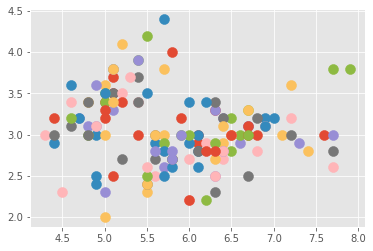

In [5]:
z = iris.data
for i,data in enumerate(iris.data): 
    plt.scatter(data[0],data[1],s=100)